# Sudoku Solver Assignment

**Instructions:**

- Use ***'Codio'*** platform to finish this assignment. If you download this file, don't upload a new ipynb file with your answers.
- You can add new cells to test the code. The added cells are not graded and don't count for the final score. ***Note: if your code uses helper function please have them define in the cells marked with 'Q'***
- Your final answers have to be typed in the cells that are marked with "**Q**".   
- After you finishing the assignment, please check whether you have saved your assignment. You can save assignment using CLTR-S or File -> Save Checkpoint
- Once you complete your assignment you can submit by clicking on Education -> Marked as Complete
- ***Do not change the parameters of the methods or the autograder will mark the answer as incorrect***

# I. Introduction

Consider the Sudoku puzzle as pictured below. There are 81 variables in total, i.e. the tiles to be filled with digits. Each variable is named by its row and its column, and must be assigned a value from 1 to 9, subject to the constraint that no two cells in the same row, column, or box may contain the same value.

<div>
<img src="attachment:image.png" width="400"/>
</div>


In this project, the goal is to build a Sudoku puzzle solver. We will focus on implementing the AC3 and the backtracking search algorithms that we learned. Below describes the grading for each part of the project:

#### CSP Class (10 points): 
    - Board (2.5 points)
    - Domain (2.5 points)
    - Contraints (5 points)
#### AC3 Algorithm (40 points):
    - CreateArcs (10 points)
    - Revise (10 points)
    - AC3 main algorithm (20 points)
#### BTS (50 points):
    - SelectUnassignVariable (10 points)
    - CheckAssignment (5 points)
    - CheckConsistent (5 points)
    - BTS algorithm (30 Points)

# II. CSP Class


In designing your classes, please represent a Sudoku board with a Python dictionary. The keys of the dictionary will be the variable names, each of which corresponds directly to a location on the board. In other words, we use the variable names Al through A9 for the top row (left to right), down to I1 through I9 for the bottom row. For example, in the example board below, we would have board["B1"] = 9, and board["E9"] = 8. This is the highly suggested representation, since it is easiest to frame the problem in terms of representation of Sudoku board, domains, and constraints if you start this way. 

Consdier the following Sudoku board:

<div>
<img src="attachment:image.png" width="200"/>
</div>




input = "003020600900305001001806400008102900700000008006708200002609500800203009005010300"

Now, you will use the CSP class in this way:


**TO DO**: Create a class called CSP, which store a representation of Sudoku board, the domain, and constraints.  

 - Populate the instance variable (board, domain and constraints) in the CSP class   
 - The above board is represented as an input string: 
        input = "003020600900305001001806400008102900700000008006708200002609500800203009005010300"
 - Create the CSP object as follows:
        csp = CSP(input)
     

**Tips**: 

 - A snippet of the variable csp.board:
<div>
<img src="attachment:image.png" width="100"/>
</div>

 - You can visualize the board by running:

        print_board(csp)

<div>
<img src="attachment:image.png" width="200"/>
</div>

 - A snippet of Domain:
 
<div>
<img src="attachment:image.png" width="200"/>
</div>

- Constraints: Recall from the lecture, we know that there are 27 constriants for the Sudoku problem where each row and column and 3x3 quadrant are all different values.

<div>
<img src="attachment:image.png" width="400"/>
</div>


- We will represent the constraints as a set of tuples. Please keep tuple in a alphabetical and numerical order list example below. Here is a snippet of csp.constraints

<div>
<img src="attachment:image.png" width="400"/>
</div>

In [390]:
from collections import Counter
from operator import itemgetter
from copy import copy

In [391]:
# Import the necessary package here. 

In [392]:
# Q
# Create the CSP class
# Your work goes here, please work on populating the variable 
# board, domain and constraints
class CSP:
    def __init__(self, initBoard):
        
        self.board = {}
        self.domain = {}
        self.constraints = []
        self.rows = "ABCDEFGHI"
        self.columns = "123456789"
        # YOUR CODE HERE
        for i, r in enumerate(self.rows):
          list_row_constraint = [r + c for c in self.columns]
          for j, c in enumerate(self.columns):
            colum_list_constraint = [r + c for r in self.rows]
            self.board[r + c] = initBoard[j + i * len(self.columns)]
            if initBoard[j + i * len(self.columns)] == '0':
              self.domain[r + c] = list(range(1,10))
            else:
              self.domain[r + c] =  [int(initBoard[j + i * len(self.columns)])]
            self.constraints.append(tuple(colum_list_constraint))
          self.constraints.append(tuple(list_row_constraint))
        list_subgrid_constraint = [
            tuple(
                self.rows[row_block + i] + self.columns[col_block + j]
                for i in range(3)
                for j in range(3)
            )
            for row_block in range(0, len(self.rows), 3)
            for col_block in range(0, len(self.columns), 3)
        ]
        self.constraints = self.constraints + list_subgrid_constraint

In [393]:
# helper function to print the board of CSP class
def print_board(csp):
    rows = "ABCDEFGHI"
    cols = "123456789"
    for i, r in enumerate(rows):
        if i in [3, 6]:
            print('------+-------+------'),
        for j, c in enumerate(cols):
            if j in [3, 6]:
                print ('|', end = " "),
            print(csp.board[r + c], end=" ")
        print()

In [394]:
input = '003020600900305001001806400008102900700000008006708200002609500800203009005010300'
csp = CSP(input)
print(csp.board)
print(csp.domain)
print(csp.constraints)
print_board(csp)

{'A1': '0', 'A2': '0', 'A3': '3', 'A4': '0', 'A5': '2', 'A6': '0', 'A7': '6', 'A8': '0', 'A9': '0', 'B1': '9', 'B2': '0', 'B3': '0', 'B4': '3', 'B5': '0', 'B6': '5', 'B7': '0', 'B8': '0', 'B9': '1', 'C1': '0', 'C2': '0', 'C3': '1', 'C4': '8', 'C5': '0', 'C6': '6', 'C7': '4', 'C8': '0', 'C9': '0', 'D1': '0', 'D2': '0', 'D3': '8', 'D4': '1', 'D5': '0', 'D6': '2', 'D7': '9', 'D8': '0', 'D9': '0', 'E1': '7', 'E2': '0', 'E3': '0', 'E4': '0', 'E5': '0', 'E6': '0', 'E7': '0', 'E8': '0', 'E9': '8', 'F1': '0', 'F2': '0', 'F3': '6', 'F4': '7', 'F5': '0', 'F6': '8', 'F7': '2', 'F8': '0', 'F9': '0', 'G1': '0', 'G2': '0', 'G3': '2', 'G4': '6', 'G5': '0', 'G6': '9', 'G7': '5', 'G8': '0', 'G9': '0', 'H1': '8', 'H2': '0', 'H3': '0', 'H4': '2', 'H5': '0', 'H6': '3', 'H7': '0', 'H8': '0', 'H9': '9', 'I1': '0', 'I2': '0', 'I3': '5', 'I4': '0', 'I5': '1', 'I6': '0', 'I7': '3', 'I8': '0', 'I9': '0'}
{'A1': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'A2': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'A3': [3], 'A4': [1, 2, 3, 4, 5, 6, 7

In [395]:
# this cell is left empty for grading the CSP Board

In [396]:
# this cell is left empty for grading the CSP domain

In [397]:
# this cell is left empty for grading the CSP Constraints

# III. AC3 Algorithm

In this section, you will implement the AC3 algorithm in Python 3. Below is the pseudocode of the AC3 algorithm. This function should revise the domain and return True if the board can be solved. 

<div>
<img src="attachment:image.png" width="600"/>
</div>

 **TO DO**: 
 
 - Write the AC3 algorithm using Revise, CreateArcs function
 
 - CreateArcs
 
        First create a set of initial set of arcs using the set of constrainsts. The CreateArcs function should return a list of tuples like below.

<div>
<img src="attachment:image.png" width="150"/>
</div>

        Using the csp class you created, you can create the queue of arcs by running.

        arcs_queue = CreateArcs(csp.constraints)

 - Revise

        Please implement the Revise method using the following pseudocode.

<div>
<img src="attachment:image.png" width="800"/>
</div>

        We will use the Revise method in this way:

            csp = CSP(input)  
            Xi = "A1"  
            Xj = "A2"  

            Revise(csp, Xi, Xj)

- These board can be solved by AC3, try out you algorithm on these boards 
        
        1) 000260701680070090190004500820100040004602900050003028009300074040050036703018000
        2) 000001000020000008691200000000000014102506003800020506005000000730000000006319405

  Obtainded the given solutions:
  
        1) 435269781682571493197834562826195347374682915951743628519326874248957136763418259
        2) 358471629427963158691285347569738214142596783873124596915647832734852961286319475
        
- If the AC3 gives atomic domains for every variable, then a solution is found. 
- Please use the helper function 'print_solved_domain' to check for solve board

In [398]:
def print_solved_domain(csp):
    #### Returns the printed solution if the domain of each variable has only one element
    #### Otherwise prints the AC3 domain.
    if max([len(val) for val in csp.domain.values()])==1:
        solution_string="".join([str(item) for sublist in list(csp.domain.values()) for item in sublist])
        print("Sudoku is Solved")
        print()
    else:
        print("Sudoku is Not Solved")
        print()
        print("Domain: ")
        return csp.domain

In [399]:
# Q
def CreateArcs(constraints):
    # YOUR CODE HERE
    arcs = []
    for constraint in constraints:
        for x in constraint:
            for y in constraint:
                if x != y:
                    arcs.append((x, y))
    return arcs

def Revise(csp, Xi, Xj):
    # YOUR CODE HERE
    revised = False
    to_remove = []
    #print(f"Revising {Xi} with respect to {Xj}:{csp.domain[Xj]}")  # Debug print
    for x in csp.domain[Xi]:
        if not any(x != y for y in csp.domain[Xj]):
            to_remove.append(x)
            revised = True
    for x in to_remove:
        csp.domain[Xi].remove(x)
        #print(f"Domain of {Xi} after revision: {csp.domain[Xi]}")  # Debug print
    return revised

def AC3(csp):
    # YOUR CODE HERE
    arcs_queue = CreateArcs(csp.constraints)
    while arcs_queue:
        Xi, Xj = arcs_queue.pop(0)
        if Revise(csp, Xi, Xj):
            if len(csp.domain[Xi]) == 0:
                #print(f"Domain of {Xi} is empty after revision. CSP is inconsistent.")  # Debug print
                return False
            for Xk in Neighbor(csp,Xi):
                if Xk != Xj:
                    arcs_queue.append((Xk, Xi))
    return True

def Neighbor(csp,Xi):
    neighbors = set()
    for constraint in csp.constraints:
        if Xi in constraint:
            neighbors.update(constraint)
    neighbors.discard(Xi)  # Remove Xi from the set of neighbors
    return neighbors

In [400]:
csp = CSP('000260701680070090190004500820100040004602900050003028009300074040050036703018000')
csp2 = CSP('000001000020000008691200000000000014102506003800020506005000000730000000006319405')
AC3(csp)
AC3(csp2)
print_solved_domain(csp)
print_solved_domain(csp2)

Sudoku is Solved

Sudoku is Solved



In [401]:
# this cell is left empty for grading CreateArcs method

In [402]:
# this cell is left empty for grading Revise method

In [403]:
# this cell is left empty for grading AC3 method

# IV. Backtracking Search

In this portion of the project, you will implement the backtracking search using the following pseudocode. 

<div>
<img src="attachment:image.png" width="600"/>
</div>

**TO DO:**
 - You will create two methods:  
     1) BTS is the main caller function that returns the assignment of the board   
     2) BackTrack is the recursive algorithm that returns whether an assignmemnt is complete and the assignment. 



 - SelectUnassignVariable:  
 
   For the selection of the unassigned variable, we will use the minimum remaining value heuristic. Recall from lecture, MRV choose the variable with the fewest legal values in its domain. 

    For example, given an initial setup of the board 

        input = "000000000302540000050301070000000004409006005023054790000000050700810000080060009"  
        csp = CSP(input)

        print_board(csp)

    <div>
    <img src="attachment:image.png" width="200"/>
    </div>

Original Domain:
           
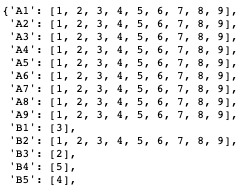

Domain after funning AC3 algorithm:
        
        AC3(csp)

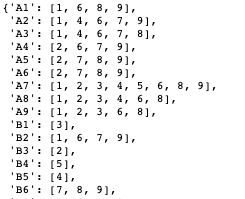
        

An assignment variable is a dictionary keys with values assigned to the specific location of the board. For example, 

        assignment = {}
    
We check for for variable that are not assigned by look at the 'assignment' variable and the csp.board and pick out the domain with minimum remaining value.
    
Running the following code should have output 'F4' becuase it is a variable that we need to find and after running AC3 algorithm we have only 1 remain value allowed for the domain. 
    
        assignment = {}  
        var = SelectUnassignVariable(assignment, csp)
        print(var)
        
    Output:
        "F4"
     
Running SelectUnassignVariable again will have output 'E2'

        assignment = {"F4":1}  
        var = SelectUnassignVariable(assignment, csp)
        print(var)
        
    Output:
        "E2" 

 - CheckAssignment
 
     This method checks if given an assignment and a CSP object, we have successfully completed. the assignment of every empty value of the board. 

    For example, 
    
        input = "000260701680070090190004500820100040004602900050003028009300074040050036703018000"
        csp = CSP(input)
        
    1)    
        assignment = {}
        answer = CheckAssignment(assignment, csp)
        print(answer)  
    Output: 
        False
        
    2)  
       assignment = {'A1': 4, 'A2': 3, 'A3': 5, 'A6': 9, 'A8': 8, 'B3': 2, 'B4': 5, 'B6': 1, 'B7': 4, 'B9':3,'C3': 7, 'C4': 8, 'C5': 3, 'C8': 6, 'C9': 2, 'D3': 6, 'D5': 9, 'D6': 5, 'D7': 3, 'D9': 7, 'E1': 3, 'E2': 7, 'E5': 8, 'E8': 1, 'E9': 5, 'F1': 9, 'F3': 1, 'F4': 7, 'F5': 4, 'F7': 6, 'G1': 5, 'G2': 1, 'G5': 2, 'G6': 6, 'G7': 8, 'H1': 2, 'H3': 8, 'H4': 9, 'H6': 7, 'H7': 1, 'I2': 6, 'I4': 4, 'I7': 2, 'I8': 5, 'I9': 9}

        answer = CheckAssignment(assignment, csp)
        print(answer)  
    Output: 
        True


- CheckConsistent

    In the CheckConsistent method, we will determine if an assignments is not violating any constriants. Constraints can be accessed using csp.constraints.

    For example, 
    
         input = "000260701680070090190004500820100040004602900050003028009300074040050036703018000"
         csp = CSP(input)
    1) 
        assignment = {'A1': 4, 'A2':3}  
        print(CheckConsistent(assignments, csp))   

        Output: 
            True

    2) 
        assignment = {'A1': 4, 'A2':4}  
        print(CheckConsistent(assignments, csp))  

        Output: 
            False

- Testing you code with the below three examples:

        1) 000000000302540000050301070000000004409006005023054790000000050700810000080060009
        2) 000260701680070090190004500820100040004602900050003028009300074040050036703018000
        3) 000100702030950000001002003590000301020000070703000098800200100000085060605009000

  Obtainded the given solutions:
  
        1) 148697523372548961956321478567983214419276385823154796691432857735819642284765139
        2) 435269781682571493197834562826195347374682915951743628519326874248957136763418259
        3) 956138742237954816481672953594867321128593674763421598879246135312785469645319287

- Lastly, you can solve sudoku problem by first reducing the domain using AC3 algorithm then running you BTS algorithm 
        
        input = "000007000090001000000045006000020000036000410500000809000000004000018000081500032"

        csp = CSP(input)
        AC3(csp)
        BTS(csp)


In [452]:
# Q
def SelectUnassignVariable(assignments, csp):
    # YOUR CODE HERE
    rows = "ABCDEFGHI"
    cols = "123456789"
    #use mrv
    mrv = None
    for r in rows:
        for c in cols:
            if r + c not in assignments:
                if mrv is None or len(csp.domain[r + c]) < len(csp.domain[mrv]):
                    mrv = r + c
    return mrv

def CheckAssignment(assignments, csp):
    # YOUR CODE HERE
    return all(csp.board[var] != '0' or var in assignments for var in csp.board)
                

def CheckConsistent(assignment, csp):
    # YOUR CODE HERE
    for constraint in csp.constraints:
        relevant_assignment = [ assignment[var] for var in constraint if var in assignment]
        if(len(relevant_assignment) != len(set(relevant_assignment))):
            return False
    return True
            
def OrderDomainValues(var, assignments, csp):
    # YOUR CODE HERE
    # use lcv
    if var is None:
        return []
    return sorted(csp.domain[var])

def BackTrack(assignments, csp):
    # YOUR CODE HERE
    if CheckAssignment(assignments,csp):
        return True, assignments
    var = SelectUnassignVariable(assignments, csp)
    for value in OrderDomainValues(var, assignments, csp):
        if CheckConsistent(assignments, csp):
            assignments[var] = value
            success, result = BackTrack(assignments, csp)
            if success:
                return success, result
            assignments.pop(var)
    return False, {}


In [453]:
# helper function to convert assignment and csp board to final solved board.
def board_to_string(assignment, csp):
    rows = "ABCDEFGHI"
    cols = "123456789"
    output = ""
    
    for r in rows:
        for c in cols:
            if r + c not in assignment:
                output += str(csp.board[r + c])
            else:
                output += str(assignment[r + c])
        
    return output

In [406]:
def BTS(csp):
    answer, assignment = BackTrack({}, csp)
    return board_to_string(assignment, csp)


In [454]:
input = "000000000302540000050301070000000004409006005023054790000000050700810000080060009"  
csp = CSP(input)

print_board(csp)

AC3(csp)
print(csp.domain)

assignment = {}  
var = SelectUnassignVariable(assignment, csp)
print(var)

assignment = {"F4":1}  
var = SelectUnassignVariable(assignment, csp)
print(var)

0 0 0 | 0 0 0 | 0 0 0 
3 0 2 | 5 4 0 | 0 0 0 
0 5 0 | 3 0 1 | 0 7 0 
------+-------+------
0 0 0 | 0 0 0 | 0 0 4 
4 0 9 | 0 0 6 | 0 0 5 
0 2 3 | 0 5 4 | 7 9 0 
------+-------+------
0 0 0 | 0 0 0 | 0 5 0 
7 0 0 | 8 1 0 | 0 0 0 
0 8 0 | 0 6 0 | 0 0 9 
{'A1': [1, 6, 8, 9], 'A2': [1, 4, 6, 7, 9], 'A3': [1, 4, 6, 7, 8], 'A4': [2, 6, 7, 9], 'A5': [2, 7, 8, 9], 'A6': [2, 7, 8, 9], 'A7': [1, 2, 3, 4, 5, 6, 8, 9], 'A8': [1, 2, 3, 4, 6, 8], 'A9': [1, 2, 3, 6, 8], 'B1': [3], 'B2': [1, 6, 7, 9], 'B3': [2], 'B4': [5], 'B5': [4], 'B6': [7, 8, 9], 'B7': [1, 6, 8, 9], 'B8': [1, 6, 8], 'B9': [1, 6, 8], 'C1': [6, 8, 9], 'C2': [5], 'C3': [4, 6, 8], 'C4': [3], 'C5': [2, 8, 9], 'C6': [1], 'C7': [2, 4, 6, 8, 9], 'C8': [7], 'C9': [2, 6, 8], 'D1': [1, 5, 6, 8], 'D2': [1, 6, 7], 'D3': [1, 5, 6, 7, 8], 'D4': [2, 7, 9], 'D5': [2, 3, 7, 8, 9], 'D6': [2, 3, 7, 8, 9], 'D7': [1, 2, 3, 6, 8], 'D8': [1, 2, 3, 6, 8], 'D9': [4], 'E1': [4], 'E2': [1, 7], 'E3': [9], 'E4': [2, 7], 'E5': [2, 3, 7, 8], 'E6': [6], 'E7': [1, 

In [455]:
input = "000260701680070090190004500820100040004602900050003028009300074040050036703018000"
csp = CSP(input)
assignment = {}
answer = CheckAssignment(assignment, csp)
print(answer)

assignment = {'A1': 4, 'A2': 3, 'A3': 5, 'A6': 9, 'A8': 8, 'B3': 2, 'B4': 5, 'B6': 1, 'B7': 4, 'B9':3,'C3': 7, 'C4': 8, 'C5': 3, 'C8': 6, 'C9': 2, 'D3': 6, 'D5': 9, 'D6': 5, 'D7': 3, 'D9': 7, 'E1': 3, 'E2': 7, 'E5': 8, 'E8': 1, 'E9': 5, 'F1': 9, 'F3': 1, 'F4': 7, 'F5': 4, 'F7': 6, 'G1': 5, 'G2': 1, 'G5': 2, 'G6': 6, 'G7': 8, 'H1': 2, 'H3': 8, 'H4': 9, 'H6': 7, 'H7': 1, 'I2': 6, 'I4': 4, 'I7': 2, 'I8': 5, 'I9': 9}

answer = CheckAssignment(assignment, csp)
print(answer) 

False
True


In [456]:
input = "000260701680070090190004500820100040004602900050003028009300074040050036703018000"
csp = CSP(input)
assignment = {'A1': 4, 'A2':3}  
print(CheckConsistent(assignment, csp))
assignment = {'A1': 4, 'A2':4}
print(CheckConsistent(assignment, csp))
assignment = {'A1': 4, 'A2':3, 'C5': 3}
print(CheckConsistent(assignment, csp))
assignment = {'A1': 4, 'A2': 3, 'A3': 5, 'A6': 9, 'A8': 8, 'B3': 2, 'B4': 5, 'B6': 1, 'B7': 4, 'B9':3,'C3': 7, 'C4': 8, 'C5': 3, 'C8': 6, 'C9': 2, 'D3': 6, 'D5': 9, 'D6': 5, 'D7': 3, 'D9': 7, 'E1': 3, 'E2': 7, 'E5': 8, 'E8': 1, 'E9': 5, 'F1': 9, 'F3': 1, 'F4': 7, 'F5': 4, 'F7': 6, 'G1': 5, 'G2': 1, 'G5': 2, 'G6': 6, 'G7': 8, 'H1': 2, 'H3': 8, 'H4': 9, 'H6': 7, 'H7': 1, 'I2': 6, 'I4': 4, 'I7': 2, 'I8': 5, 'I9': 9}
print(CheckConsistent(assignment, csp))

True
False
True
True


In [457]:
input = "000000000302540000050301070000000004409006005023054790000000050700810000080060009"
csp = CSP(input)

AC3(csp)
print(BTS(csp))

input = "000260701680070090190004500820100040004602900050003028009300074040050036703018000"
csp = CSP(input)
AC3(csp)
print(BTS(csp))

input = "000100702030950000001002003590000301020000070703000098800200100000085060605009000"
csp = CSP(input)
AC3(csp)
print(BTS(csp))

input = "000007000090001000000045006000020000036000410500000809000000004000018000081500032"
csp = CSP(input)
AC3(csp)
print(BTS(csp))

148697123372548961956321478567983214419276385823154796691432857735819642284765139
435269781682571493197834562826195347374682915951743628519326874248957136763418259
956138742237954816481672953594867321128593674763421598879246135112785469645319287
653287941794631258128945376819724563236859417547163829965372184372218695481596732


In [411]:
# this cell is left empty for grading SelectUnassignVariable method

In [412]:
# this cell is left empty for grading CheckAssignment method

In [413]:
# this cell is left empty for grading CheckConsistent method

In [414]:
# this cell is left empty for grading BackTrack method

# V. [Optional ] Forward Checking 

Using the algorithm for part IV, we are able to solve most Sudoku puzzles, but for some harder sudokus, this algorithm will take long time to execute. We can accelerate the execution speed by adding foward checking to reduce the variable domains. We can implement forward checking in the Inference method. Below, we describe the backtracking seach algorithm with forward checking. In the starter zip, under util/sudokus_start.txt , you will find hundreds of unsolved Sudoku boards. Under util/sudokus_finish.txt you will find the corresponding solutions. Try to implement the forward checking algorithm and solve these boards. 



<div>
<img src="attachment:image.png" width="600"/>
</div>


